# Teorema de Bayes usando Python

## Problemas de Aplicación

### Análisis de una prueba de diagnóstico médico

- Un ejemplo muy utilizado de las ventajas del `Teorema de Bayes` es el análisis de una prueba de diagnóstico médico.

- `Escenario`: Considere una población humana que puede o no tener cáncer (Cáncer es `True` o `False`) y una prueba médica que da un resultado positivo o negativo para detectar el cáncer (La prueba es `Positive` o `Negative`), por ejemplo, como una mamografía para detectar el cáncer de mama.

> `Problema`: Si un paciente seleccionado al azar se somete a la prueba y ésta da un resultado `positivo`, ¿cuál es la probabilidad de que el paciente tenga cáncer?

#### Cálculo manual

- Las pruebas de diagnóstico médico no son perfectas; tienen errores. A veces, un paciente tendrá cáncer, pero la prueba no lo detectará. Esta capacidad de la prueba para detectar el cáncer se denomina `sensibilidad` o `tasa de verdaderos positivos`.

- En este caso, se calcula un valor de sensibilidad para la prueba. La prueba es buena, pero no excelente, con una tasa de verdaderos positivos o `sensibilidad del 85%`. Es decir, de todas las personas que tienen cáncer y se someten a la prueba, el `85% de ellas obtendrán un resultado positivo de la prueba`. Entonces

$$P(\textsf{Test=Positive} |  \textsf{Cancer=True}) = 0.85$$

- Dada esta información, nuestra intuición sugeriría que hay un 85% de probabilidad de que el paciente tenga cáncer. `Nuestras intuiciones sobre la probabilidad son erróneas.`

- Este tipo de error en la interpretación de las probabilidades es tan común que tiene su propio nombre; se denomina `falacia de la tasa base` [base rate fallacy](https://en.wikipedia.org/wiki/Base_rate_fallacy).

- Tiene este nombre porque el error en la estimación de la probabilidad de un suceso se debe a que se ignora la tasa base. Es decir, ignora la probabilidad de que una persona seleccionada al azar tenga cáncer, independientemente de los resultados de una prueba diagnóstica.

- En este caso, podemos suponer que la probabilidad de cáncer de mama es baja, y utilizar un valor de tasa base artificial de una persona de cada `5000, o (0.0002) = 0.02%`.

$$P(\textsf{Cancer=True}) = 0.02%$$

- Podemos calcular correctamente la probabilidad de que un paciente tenga cáncer dado un resultado positivo de la prueba utilizando el `Teorema de Bayes`. Traslademos nuestro escenario al siguiente sistema de ecuaciones

$$
\begin{align*}
P(A|B)&=\frac{P(A)\cdot P(B|A)}{P(B)}\\
P(\textsf{Cancer=True} | \textsf{Test=Positive}) &= \frac{P(\textsf{Cancer=True})\cdot P(\textsf{Test=Positive} | \textsf{Cancer=True})}{P(\textsf{Test=Positive})} 
\end{align*}
$$

- Sabemos que la probabilidad de que la prueba sea positiva dado que el paciente tiene cáncer es del `85%`, y sabemos que la tasa base o la probabilidad previa de que un determinado paciente tenga cáncer es del `0.02%`; podemos introducir estos valores:

$$
P(\textsf{Cancer=True} | \textsf{Test=Positive}) = \frac{0.85\cdot0.0002}{P(\textsf{Test=Positive})} 
$$

- Nótese que no conocemos $P(\textsf{Test=Positivo})$, no se da directamente. En cambio, podemos estimarlo utilizando:

$$
\begin{align*}
P(B) &= P(A)\cdot P(B|A) + P(A^{c})\cdot P(B|A^{c})\\
P(\textsf{Test=Positive}) &= P(\textsf{Cancer=True})\cdot P(\textsf{Test=Positive} | \textsf{Cancer=True})\\
&+ P(\textsf{Cancer=False})\cdot P(\textsf{Test=Positive} | \textsf{Cancer=False}) 
\end{align*}
$$

- En primer lugar, podemos calcular $P(\textsf{Cáncer=Falso})$ como el complemento de $P(\textsf{Cáncer=Verdadero})$, que ya conocemos


$$
P(\textsf{Cancer=False}) = 1 – P(\textsf{Cancer=True}) = 1 – 0.0002 = 0.9998
$$

- Vamos a complementar lo que tenemos. Podemos introducir nuestros valores conocidos de la siguiente manera

$$
P(\textsf{Test=Positive}) = 0.85\cdot 0.0002 + P(\textsf{Test=Positive} | \textsf{Cancer=False})\cdot 0.9998
$$

- Todavía no sabemos la probabilidad de un resultado positivo de la prueba si no hay cáncer. Esto requiere información adicional. En concreto, necesitamos saber que tan buena es la prueba para identificar correctamente a las personas que no tienen cáncer. Es decir, el resultado negativo de la prueba ($\textsf{Test=Negativo}$) cuando el paciente no tiene cáncer ($\textsf{Cáncer=Falso}$), lo que se llama la tasa de verdaderos negativos o la especificidad. Utilizaremos un valor de `especificidad artificial del 95%`.

$$
P(\textsf{Test=Negative} | \textsf{Cancer=False}) = 0.95
$$

- Con este último dato, podemos calcular la tasa de falsos positivos o de falsas alarmas como el complemento de la tasa de verdaderos negativos.

$$
P(\textsf{Test=Positive} | \textsf{Cancer=False}) = 1 – P(\textsf{Test=Negative} | \textsf{Cancer=False})= 1 – 0.95 = 0.05
$$

- Podemos introducir esta tasa de falsas alarmas en nuestro cálculo de $P(\textsf{Prueba=Positiva})$ de la siguiente manera

$$
\begin{align*}
P(\textsf{Test=Positive}) &= 0.85\cdot0.0002 + 0.05\cdot0.9998\\
&= 0.00017 + 0.04999\\
&= 0.05016\\
\end{align*}
$$

- Por lo que la probabilidad de que la prueba dé un resultado positivo, independientemente de si la persona tiene cáncer o no, es de aproximadamente el `5%`. Ahora tenemos suficiente información para aplicar el `Teorema de Bayes` y estimar la probabilidad de que una persona seleccionada al azar tenga cáncer si obtiene un resultado positivo en la prueba

$$
\begin{align*}
P(\textsf{Cancer=True} | \textsf{Test=Positive}) &= \frac{P(\textsf{Cancer=True})\cdot P(\textsf{Test=Positive} | \textsf{Cancer=True})}{P(Test=Positive)}\\
&= \frac{(0.0002)\cdot(0.85)}{0.05016}\\
&= \frac{0.00017}{0.05016}\\[2mm] 
&= 0.003389154704944
\end{align*}
$$

- El cálculo sugiere que si se informa al paciente de que tiene cáncer con esta prueba, sólo hay un `0.33%` de posibilidades de que lo tenga. Es una prueba de diagnóstico inadecuada.

- El ejemplo también muestra que el cálculo de la probabilidad condicional requiere bastante información. Por ejemplo, si ya tenemos los valores utilizados en el `Teorema de Bayes`, podemos utilizarlos directamente.

- Esto no suele ser así, y normalmente tenemos que calcular las partes que necesitamos y unirlos, como hicimos en este caso. En nuestro caso, se nos han dado tres datos: `la tasa base, la sensibilidad (o tasa de verdaderos positivos) y la especificidad (o tasa de verdaderos negativos).`

    - `Sensibilidad`: el `85%` de las personas con cáncer obtendrán un resultado positivo en la prueba.
    - `Tasa base`: El `0.02%` de las personas tienen cáncer.
    - `Especificidad`: el `95%` de las personas sin cáncer obtendrán un resultado negativo en la prueba.

- No disponíamos de la $P(\textsf{Prueba=Positiva})$, pero la calculamos teniendo en cuenta lo que ya teníamos disponible.

- El `Teorema de Bayes` nos permite ser aún más precisos sobre un escenario dado. Por ejemplo, si tuviéramos más información sobre el paciente (por ejemplo, su edad) y sobre el ámbito (por ejemplo, las tasas de cáncer para los rangos de edad), podríamos ofrecer una estimación de la probabilidad aún más precisa.

- Veamos cómo podemos calcular este escenario exacto utilizando unas pocas líneas de código `Python`.

#### Cálculo usando Python

- El siguiente ejemplo realiza el mismo cálculo en `Python`, lo que le permite jugar con los parámetros y probar diferentes escenarios.
- Calculamos las probabilidades: $P(A|B)$ given $P(A)$, $P(B|A)$, $P(B|A^{c})$

In [1]:
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
    
    not_a = 1 - p_a # P(not A)
    p_b = p_b_given_a * p_a + p_b_given_not_a * not_a # P(B)
    p_a_given_b = (p_b_given_a * p_a) / p_b # P(A|B)
    
    return p_a_given_b

- Datos dados por el problema a priori

In [2]:
p_a = 0.0002 # P(A)
p_b_given_a = 0.85 # P(B|A)
p_b_given_not_a = 0.05 # P(B|not A)

- Usando la función: `bayes_theorem`

In [3]:
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a) # P(A|B)
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 0.339%


- Al ejecutar el ejemplo se calcula la probabilidad de que un paciente tenga cáncer si la prueba arroja un resultado positivo, lo que coincide con nuestro cálculo manual.

> $P(A|B)$ = 0.339%

- Este es un pequeño script útil que se puede adaptar a nuevos escenarios

### Clasificador binario: Terminología

- Puede ser útil pensar en el ejemplo de la prueba del cáncer en términos de la `clasificación binaria` (de dos clases), es decir, de donde provienen las nociones de [`especificidad y sensibilidad`](https://en.wikipedia.org/wiki/Sensitivity_and_specificity). Estos términos ayudan a que todo tenga más sentido.

- En primer lugar, definamos una `matriz de confusión`

- Una `matriz de confusión` es un resumen de los resultados de las predicciones en un problema de clasificación. El número de predicciones correctas e incorrectas se resume con valores de recuento y se desglosa por cada clase. Esta es la clave de la matriz de confusión. 

- La matriz de confusión muestra las formas en que su modelo de clasificación se confunde cuando hace predicciones. Le da una idea no solo de los errores que comete su clasificador, sino, lo que es más importante, de los tipos de errores que se cometen

|     | Clase positiva | Clase negativa |
| -------- | -------- | ------ |
| **Predicción positiva**  | Verdaderos Positivos (VP) | Falsos Positivos (FP) |
| **Predicción negativa** | Falsos Negativos (FN) | Verdaderos Negativos (VN) |

- A continuación, podemos definir algunos índices a partir de la matriz de confusión

    - Tasa de verdaderos positivos: $TVP = \displaystyle{\frac{VP}{VP + FN}}$
    - Tasa de falsos positivos:     $TFP = \displaystyle{\frac{FP}{FP + VN}}$
    - Tasa de verdaderos negativos: $TVN = \displaystyle{\frac{VN}{VN + FP}}$    
    - Tasa de falsos negativos:     $TFN = \displaystyle{\frac{FN}{FN + VP}}$

- Estos términos se denominan tasas, pero también pueden interpretarse como probabilidades. Nótese lo siguiente:

$$
\begin{align*}
TVP + TFN &= 1.0\Rightarrow TFN = 1.0-TVP\quad\text{o}\quad TVP = 1.0-TFN\\
TVN + TFP &= 1.0\Rightarrow TVN = 1.0-TFP\quad\text{o}\quad TFP = 1.0-TVN
\end{align*}
$$

- Recordemos que en una sección anterior calculamos la tasa de falsos positivos dado el complemento de la tasa de verdaderos negativos, o $TFP = 1.0 - TVN$. Algunas de estas tasas tienen nombres especiales, por ejemplo:

    - Sensibilidad  = $TVP$
    - Especificidad = $TVN$

- Podemos asignar estos índices a términos conocidos del `Teorema de Bayes`:

    - $P(B|A)$: Tasa de verdaderos positivos: $TVP$
    - $P(B^{c}|A^{c})$: Tasa de verdaderos negativos $TVN$
    - $P(B|A^{c})$: Tasa de falsos positivos $TFP$
    - $P(B^{c}|A)$: Tasa de falsos negativos $TFN$
    
- También podemos mapear las tasas base para la condición (`clase`) y el tratamiento (`predicción`) en términos familiares del `Teorema de Bayes`:

    - $P(A)$: Probabilidad de un Clase Positiva (CP)
    - $P(A^{c})$: Probabilidad de una Clase Negativa (CN)
    - $P(B)$: Probabilidad de una Predicción Positiva (PP)
    - $P(B^{c})$: Probabilidad de una Predicción Negativa (PN)
    
- Ahora, consideremos el `Teorema de Bayes` utilizando estos términos

$$
\begin{align*}
P(A|B) &= \frac{P(A)\cdot P(B|A)}{P(B)}\\ 
&= \frac{CP\cdot TVP}{PP}
\end{align*}
$$

- Cuando a menudo no podemos calcular $P(B)$, utilizamos una alternativa

$$
\begin{align*}
P(B) &= P(A)\cdot P(B|A)+P(A^{c})\cdot P(B|A^{c})\\
&= CP\cdot TVP + CN\cdot TFP
\end{align*}
$$

- Ahora, veamos nuestro escenario de cáncer y una prueba de detección de cáncer. La clase o condición sería `"Cáncer"` y el tratamiento o predicción sería la `"Prueba"`. En primer lugar, revisemos todos los índices:

    - Tasa de verdaderos positivos (TVP): 85%
    - Tasa de falsos positivos (TFP): 5%
    - Tasa de verdaderos negativos (TVN): 95%.
    - Tasa de falsos negativos (TFN): 15%.
    
- Repasemos también lo que sabemos sobre las tasas básicas

    - Clase positiva (CP): 0.02%
    - Clase negativa (CN): 99.98%
    - Predicción positiva (PP): 5.016%.
    - Predicción negativa (PN): 94.984%.

- Uniendo las cosas, podemos calcular la probabilidad de un resultado positivo de la prueba (una `predicción positiva`) como la probabilidad de un resultado positivo de la prueba dado que tiene cáncer (la `tasa positiva verdadera`) multiplicada por la tasa base de tener cáncer (la `clase positiva`), más la probabilidad de obtener un resultado positivo de la prueba dado que no tiene cáncer (la `tasa positiva falsa`) más la probabilidad de no tener cáncer (la `clase negativa`)
- El cálculo con estos términos es el siguiente

$$
\begin{align*}
P(B) &= P(A)\cdot P(B|A) + P(A^{c})\cdot P(B|A^{c})\\
&= CP\cdot TVP + CN\cdot TFP\\
&= 85\%\cdot0.02\% + 5\%\cdot99.98\%\\
&= 5.016\%
\end{align*}
$$

- A continuación, podemos calcular el `Teorema de Bayes` para el escenario, es decir, la probabilidad de tener cáncer dado un resultado positivo de la prueba (la `posterior`) es la probabilidad de un resultado positivo de la prueba dado que tiene cáncer (la `tasa positiva verdadera`) multiplicada por la probabilidad de tener cáncer (la `tasa de clase positiva`), dividida por la probabilidad de un resultado positivo de la prueba (una `predicción positiva`). El cálculo con estos términos es el siguiente:

$$
\begin{align*}
P(A|B) &= \frac{P(A)\cdot P(B|A)}{P(B)}\\
&= \frac{PC\cdot TVP}{PP}\\
&= \frac{85\%\cdot0.02\%}{5.016\%}\\ 
&= 0.339%
\end{align*}
$$

- Resulta que en este caso, la probabilidad posterior que estamos calculando con el `Teorema de Bayes` es equivalente a la precisión, también llamada `Valor Predictivo Positivo (VPP)` de la matriz de confusión

$$VPP = \frac{VP}{VP + FP}$$

- O, dicho en términos de nuestro clasificador:

$$
\begin{align*}
P(A|B) &= VPP\\
VPP &= \frac{TVP\cdot CP}{PP} 
\end{align*}
$$

- Entonces, `¿por qué nos tomamos la molestia de calcular la probabilidad posterior?`. Porque no tenemos la matriz de confusión para una población de personas con y sin cáncer que se han sometido a la prueba y que no se han sometido a ella. En lugar de ello, todo lo que tenemos son algunas probabilidades a priori sobre nuestra población y nuestra prueba.

- Esto pone de manifiesto cuándo podríamos optar por utilizar el cálculo en la práctica. En concreto, cuando tenemos creencias sobre los eventos implicados, pero no podemos realizar el cálculo contando ejemplos en el mundo real.

**`Ejercicio`**: Escriba un par de funciones en `Python` para calcular: $P(B)$ y $P(A|B)$, usando solamente: 

- `Sensibilidad`: el `85%` de las personas con cáncer obtendrán un resultado positivo en la prueba
- `Tasa base`: El `0.02%` de las personas tienen cáncer
- `Especificidad`: el `95%` de las personas sin cáncer obtendrán un resultado negativo en la prueba.

### Ventas en supermercados

**`Contexto`**

- El crecimiento de los supermercados en la mayoría de las ciudades pobladas es cada vez mayor y la competencia en el mercado también es alta. El conjunto de datos comprende el histórico de ventas de supermercados que se ha registrado en 3 sucursales diferentes durante 3 meses. Realizaremos un análisis exploatorio de los datos para tratar de identificar patrones importantes en los datos

- `Información de atributos`

    - `Invoice id`: Número de identificación de la factura de venta generado por ordenador
    - `Branch`: Sucursal del supercentro (se dispone de 3 sucursales identificadas por A, B y C).
    - `City`: Ubicación de los supercentros
    - `Customer type`: Tipo de clientes, registrado por Socios para los clientes que usan tarjeta de socio y Normal para los que no tienen tarjeta de socio.
    - `Gender`: Tipo de género del cliente
    - `Product line`: Grupos de categorización de artículos generales - Accesorios electrónicos, Accesorios de moda, Alimentos y bebidas, Salud y belleza, Hogar y estilo de vida, Deportes y viajes
    - `Unit price`: Precio unitario: Precio de cada producto en USD.
    - `Quantity` : Número de productos comprados por el cliente
    - `Tax`: Tasa de impuesto del 5% para la compra del cliente
    - `Total`: Precio total con impuestos incluidos
    - `Date`: Fecha de compra (Registro disponible desde enero de 2019 hasta marzo de 2019)
    - `Time`: Hora de la compra (de 10 a 21 horas)
    - `Payment`: Pago utilizado por el cliente para la compra (hay 3 métodos disponibles: efectivo, tarjeta de crédito y Ewallet)
    - `COGS`: Coste de la mercancía vendida
    - `Gross margin percentage`: Porcentaje de margen bruto
    - `Gross income`: Ingreso bruto
    - `Rating`: Calificación de la estratificación de los clientes sobre su experiencia general de compra (En una escala de 1 a 10)

**`Esquema del proyecto`**

- Instalar e importar las librerias necesarias
- Descargue el conjunto de datos
- Realice un análisis exploratorio y una visualización
- Formular y responder preguntas sobre los datos

**`Instalación de las bibliotecas necesarias`**

- Comenzamos instalando las librerías necesarias como `Pandas, NumPy, Matplotlib, Seaborn` y `Folium`
- Importe cada librería

In [4]:
import os
import pandas as pd 
import numpy as np
import missingno as msno
import folium
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

**`Cargue los datos desde el link de Github`**

In [5]:
dataset_url = 'https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/supermarket_sales.csv'

In [6]:
supermarket_df = pd.read_csv(dataset_url)

In [7]:
supermarket_df.head().style.background_gradient(cmap='GnBu')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,1/5/2019,13:08,Ewallet,522.830000,4.761905,26.141500,9.100000
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,3/8/2019,10:29,Cash,76.400000,4.761905,3.820000,9.600000
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330000,7,16.215500,340.525500,3/3/2019,13:23,Credit card,324.310000,4.761905,16.215500,7.400000
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220000,8,23.288000,489.048000,1/27/2019,20:33,Ewallet,465.760000,4.761905,23.288000,8.400000
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310000,7,30.208500,634.378500,2/8/2019,10:37,Ewallet,604.170000,4.761905,30.208500,5.300000


- Nótese que la intensidad del color en las celdas de cada columna aumentan o disminuyen, dependiendo de la magnitud de los valores en cada casilla. Después de leer los datos, los preprocesamos.

**`Probabilidades`**

- Verifique si existe alguna diferencia, entre las probabilidades de que las compras hayan sido realizadas por hombres o por mujeres: `Male` o `Female`. Recuerde la formula para la probabilidad clasica

$$
P(A)=\frac{N(A)}{N}
$$

In [8]:
N_t = len(supermarket_df)
N_m = len(supermarket_df[supermarket_df["Gender"]=="Female"])
N_h = len(supermarket_df[supermarket_df["Gender"]=="Male"])

P_h = 100*(N_h/N_t)
print("Probabilidad compras realizadas -> Hombres = %", P_h)

P_m = 100*(N_m/N_t)
print("Probabilidad compras realizadas -> Mujeres = %", P_m)

Probabilidad compras realizadas -> Hombres = % 49.9
Probabilidad compras realizadas -> Mujeres = % 50.1


- Verifique si existe alguna diferencia, entre las probabilidades de que las compras relacionadas con salud y belleza `Health and beauty` hayan sido realizadas por hombres o por mujeres

In [9]:
Nhb_h = supermarket_df.loc[(supermarket_df["Product line"]=="Health and beauty") & 
                            (supermarket_df["Gender"]=="Male")].shape[0]
Nhb_m = supermarket_df.loc[(supermarket_df["Product line"]=="Health and beauty") & 
                            (supermarket_df["Gender"]=="Female")].shape[0]
Nhb_t = supermarket_df.loc[(supermarket_df["Product line"]=="Health and beauty")].shape[0]


Phb_h = 100*(Nhb_h/Nhb_t)
print("Probabilidad caso Health and beauty -> Hombres = %", Phb_h)

Phb_m = 100*(Nhb_m/Nhb_t)
print("Probabilidad caso Health and beauty -> Mujeres = %", Phb_m)

Probabilidad caso Health and beauty -> Hombres = % 57.89473684210527
Probabilidad caso Health and beauty -> Mujeres = % 42.10526315789473


**`Preprocesamiento de datos`**

- Calculamos el número de filas y columnas e identificamos si hay datos faltantes

In [10]:
shape = supermarket_df.shape
print(f'#Filas = {shape[0]}, #Columnas = {shape[1]}')

#Filas = 1000, #Columnas = 17


**`Visualizamos los valores NaN en cada columna`**

<Figure size 720x1440 with 0 Axes>

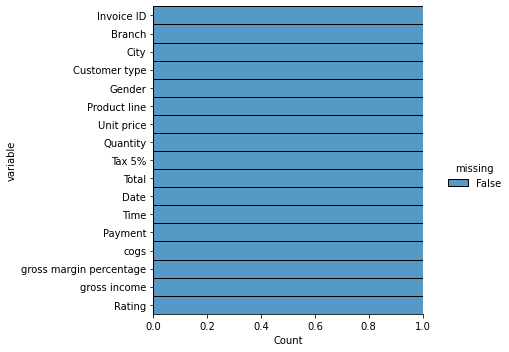

In [11]:
plt.figure(figsize=(10,20))
sns.displot(
    data=supermarket_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

- No tenemos datos faltantes. Realizamos ahora pasos adicionales como el análisis de fechas y la creación de columnas adicionales.
- Convertimos las columnas de fecha en fecha-hora 

In [12]:
supermarket_df.Date = pd.to_datetime(supermarket_df.Date)
supermarket_df.head().style.background_gradient(cmap='GnBu')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,2019-01-05 00:00:00,13:08,Ewallet,522.830000,4.761905,26.141500,9.100000
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,2019-03-08 00:00:00,10:29,Cash,76.400000,4.761905,3.820000,9.600000
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330000,7,16.215500,340.525500,2019-03-03 00:00:00,13:23,Credit card,324.310000,4.761905,16.215500,7.400000
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220000,8,23.288000,489.048000,2019-01-27 00:00:00,20:33,Ewallet,465.760000,4.761905,23.288000,8.400000
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310000,7,30.208500,634.378500,2019-02-08 00:00:00,10:37,Ewallet,604.170000,4.761905,30.208500,5.300000


- Añadir una columna de mes, día y día de la semana

In [13]:
supermarket_df['month']=supermarket_df.Date.dt.month
supermarket_df['day']=supermarket_df.Date.dt.day
supermarket_df['weekday']=supermarket_df.Date.dt.day_name()

supermarket_df.head().style.background_gradient(cmap='GnBu')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,2019-01-05 00:00:00,13:08,Ewallet,522.830000,4.761905,26.141500,9.100000,1,5,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,2019-03-08 00:00:00,10:29,Cash,76.400000,4.761905,3.820000,9.600000,3,8,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330000,7,16.215500,340.525500,2019-03-03 00:00:00,13:23,Credit card,324.310000,4.761905,16.215500,7.400000,3,3,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220000,8,23.288000,489.048000,2019-01-27 00:00:00,20:33,Ewallet,465.760000,4.761905,23.288000,8.400000,1,27,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310000,7,30.208500,634.378500,2019-02-08 00:00:00,10:37,Ewallet,604.170000,4.761905,30.208500,5.300000,2,8,Friday


- Añadimos una columna de horas y minutos

In [14]:
supermarket_df['hour']=supermarket_df.Time.str[0:2]
supermarket_df['minute']=supermarket_df.Time.str[3:5]

supermarket_df['hour']=pd.to_numeric(supermarket_df['hour'])
supermarket_df['minute']=pd.to_numeric(supermarket_df['minute'])

supermarket_df.head().style.background_gradient(cmap='GnBu')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day,weekday,hour,minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,2019-01-05 00:00:00,13:08,Ewallet,522.830000,4.761905,26.141500,9.100000,1,5,Saturday,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,2019-03-08 00:00:00,10:29,Cash,76.400000,4.761905,3.820000,9.600000,3,8,Friday,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330000,7,16.215500,340.525500,2019-03-03 00:00:00,13:23,Credit card,324.310000,4.761905,16.215500,7.400000,3,3,Sunday,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220000,8,23.288000,489.048000,2019-01-27 00:00:00,20:33,Ewallet,465.760000,4.761905,23.288000,8.400000,1,27,Sunday,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310000,7,30.208500,634.378500,2019-02-08 00:00:00,10:37,Ewallet,604.170000,4.761905,30.208500,5.300000,2,8,Friday,10,37


- Busqueda de patrones importantes

In [15]:
cities = pd.DataFrame({'city': ['Yangon', 'Naypyitaw', 'Mandalay'],
                       'Latitude': [16.8409,19.7633,21.9588],
                       'Longitude' : [96.1735, 96.0785, 96.0891]})

market_map = folium.Map(location = [21.9162,95.9560], zoom_start = 5, tiles = 'CartoDB Positron', control_scale = True)

plt.figure(figsize=(800,600));

for (i, j) in cities.iterrows():
  folium.Marker(location = [j.loc['Latitude'], j.loc['Longitude']], popup = j.loc['city'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(market_map)

market_map

<Figure size 57600x43200 with 0 Axes>

- Realizamos un `diagrama de barras`, donde las categorías coressponden a cada país y sus frecuencias la suma total de supermercados en cada uno de estos

In [16]:
sale = supermarket_df.groupby('City').sum()['Total']
cities = [city for city, supermarket_df in supermarket_df.groupby('City')]

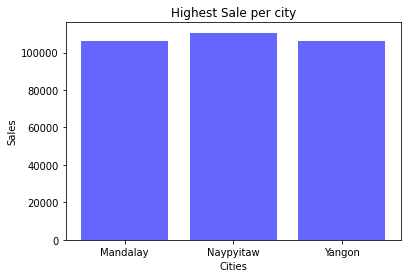

In [17]:
plt.bar(cities, sale, color='blue',alpha=.6)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.title('Highest Sale per city')
plt.show()

- Nótese que Naypitaw tiene el mayor número de ventas, sin embargo, Mandalay y Yangon no están demasiado lejos de Naypitaw

**`Month`**

In [18]:
sale = supermarket_df.groupby('month').sum()['Total']
month = ['January','February','March']
c = ['b','k','b']

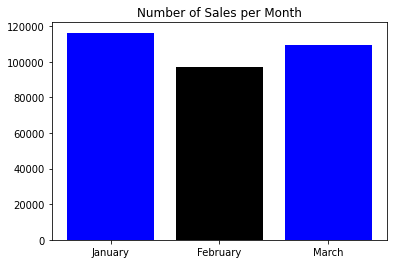

In [19]:
plt.bar(month,sale,color=c)
plt.title('Number of Sales per Month')
plt.show()

- El supermercado obtiene buenos resultados en enero. Tiene un descenso en las transacciones en febrero y se recupera en marzo

**`Quantity`**

In [20]:
quantity = supermarket_df.groupby('month').sum()['Quantity']

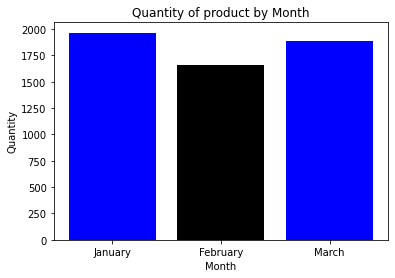

In [21]:
plt.title('Quantity of product by Month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.bar(month,quantity,color=c)
plt.show()

- El gráfico de cantidades sigue un patrón similar al del gráfico de ventas. Tenemos una correlación entre el número de productos y el número de artículos vendidos.

**`Rating`**

/home/lihkir/PythonEnvs/data_challenge/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


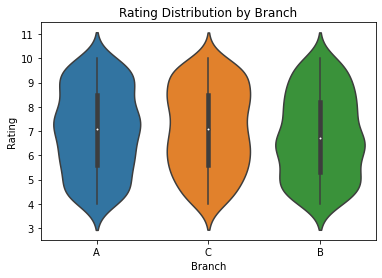

In [22]:
plt.title('Rating Distribution by Branch');
sns.violinplot('Branch','Rating',data=supermarket_df);

- La sucursal $A$ ha recibido la calificación más positiva debido a la forma cónica hacia el centro entre los valores 6 a 9.
- La sucursal $B$ tiene la valoración más negativa debido a la forma cónica entre los valores 4 a 6.
- La sucursal $C$ tiene una valoración positiva y negativa casi igual entre los valores 4 a 6 y 8 a 10.

**`Payment`**

In [23]:
method=supermarket_df.groupby('Payment').count()['Total']
payment=['Cash','Credit card','Ewallet']
c=['k','b','r']

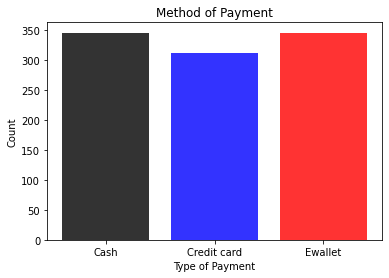

In [24]:
plt.bar(payment,method,color=c,alpha=0.8)
plt.xlabel('Type of Payment')
plt.ylabel('Count')
plt.title('Method of Payment')
plt.show()

- El efectivo es utilizado principalmente por los clientes en las sucursales

**`Hour`**

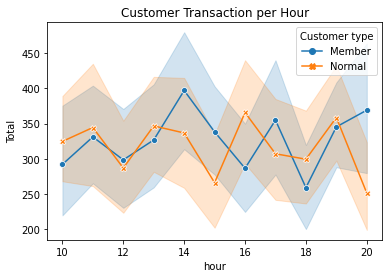

In [25]:
plt.title('Customer Transaction per Hour')
sns.lineplot(data=supermarket_df,
             x='hour',y='Total',
             hue='Customer type',
             markers=True,
             style='Customer type',
             dashes=False); 

- A los clientes normales y a los socios les gusta comprar hacia el mediodía, pero los socios realizan el mayor número de transacciones a las 14 horas. Hacia las 16.00 y las 21.00 horas, los clientes normales son los que más compran.

**`Correlation`**

- Creamos primerlo una matriz de correlación

In [26]:
corr_df=supermarket_df.corr()

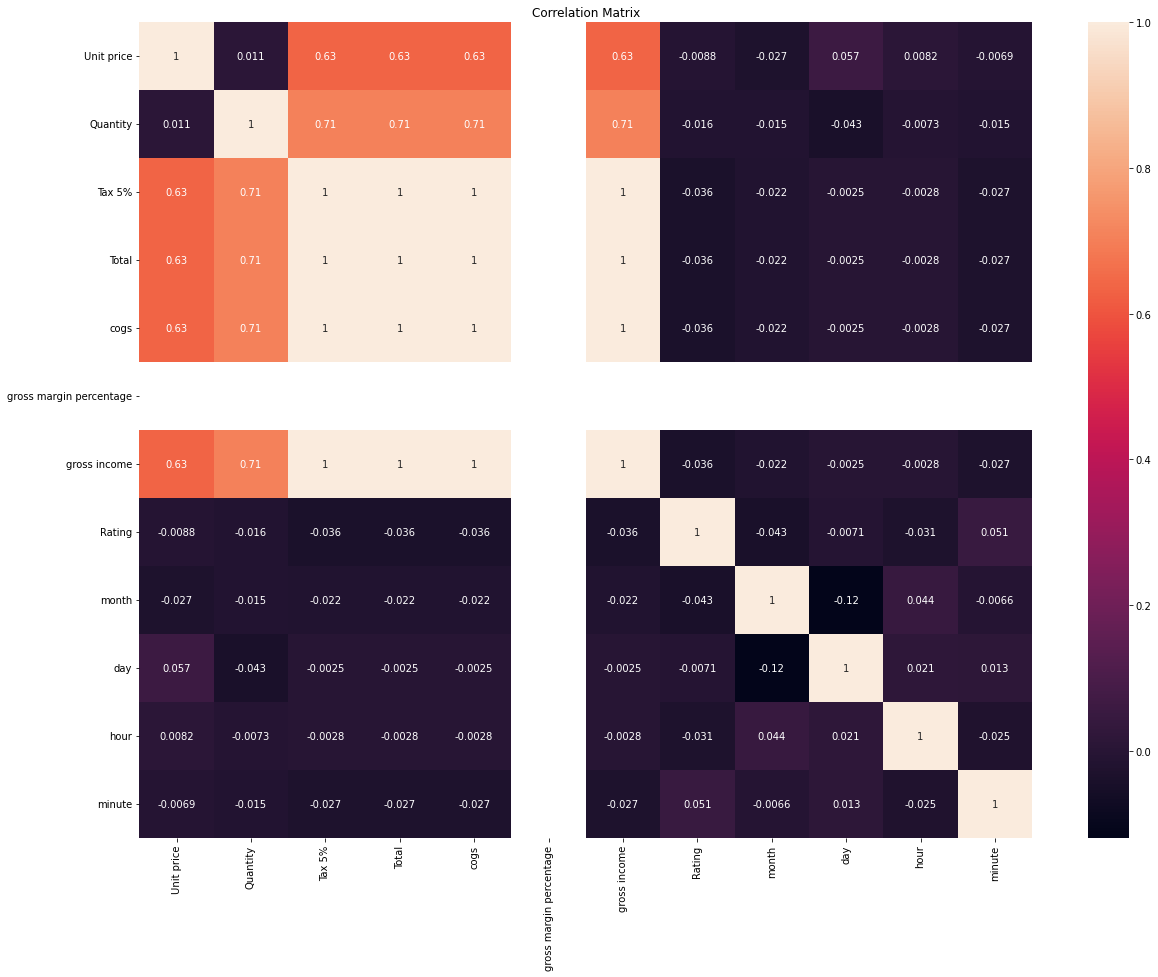

In [27]:
plt.figure(figsize=(20,15))
plt.title('Correlation Matrix')
sns.heatmap(corr_df,annot=True)
plt.show()

- Las barras blancas representan los valores (porcentaje de margen bruto frente a porcentaje de margen bruto)
- El color púrpura representa una correlación casi nula entre las columnas
- El bloque naranja representa una alta correlación entre los valores. Así, `taxes`, `Total`, y `cogs` están muy correlacionados con `Quantity` y `Unit price`
- El bloque más claro representa la perfecta correlación entre los valores de las mismas columnas.
- Después de obtener una `insight` de los datos, podríamos empezar a plantear algunas preguntas

**`Q1: ¿Cuál fue el número total de ventas? ¿Qué sucursal tiene el mayor número de ventas?`**

In [28]:
sale_branch=supermarket_df.groupby('Branch').sum()['Total']
print('Branch C has the highest number of sale of {}$'.format(max(sale_branch)))

Branch C has the highest number of sale of 110568.7065$


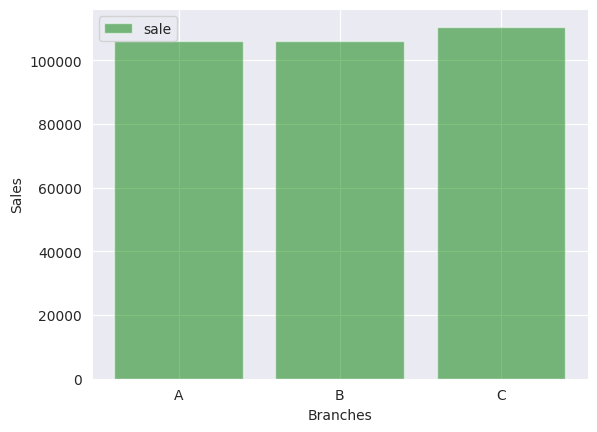

In [29]:
plt.style.use('default')
sns.set_style('darkgrid')

branches = [branch for branch, supermarket_df in supermarket_df.groupby('Branch')]

plt.bar(branches,sale_branch,alpha=0.5,color='g')
plt.xlabel('Branches')
plt.ylabel('Sales')
plt.legend(['sale'],loc='upper left')
plt.show()

**`Q2: ¿Qué tipo de producto se vende más?`**

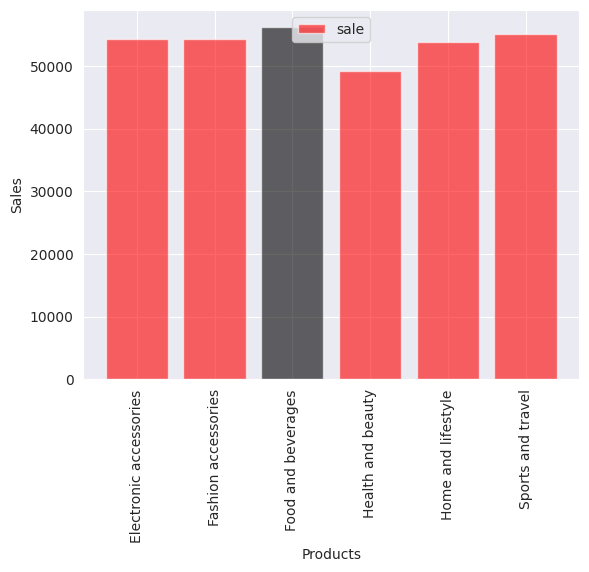

In [30]:
sale_product=supermarket_df.groupby('Product line').sum()['Total']
products =[product for product, supermarket_df in supermarket_df.groupby('Product line')]
c=['r','r','k','r','r','r']

plt.bar(products,sale_product,alpha=0.6,color=c)
plt.xticks(products, rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.legend(['sale'],loc='upper center')
plt.show()

**`Q3: ¿Qué género compra más artículos en cada categoría? ¿Cuál es la categoría?`**

In [31]:
supermarket_df['male']=supermarket_df['Gender'][supermarket_df['Gender'] == 'Male']
supermarket_df['female']=supermarket_df['Gender'][supermarket_df.Gender.str.contains('Female')]
product_gender=supermarket_df.groupby('Product line').count()
product_gender=product_gender[['male', 'female']].copy()
supermarket_df.drop(columns=['male','female'],inplace=True)

In [32]:
product_gender

,male,female
Product line,,
Electronic accessories,86,84
Fashion accessories,82,96
Food and beverages,84,90
Health and beauty,88,64
Home and lifestyle,81,79
Sports and travel,78,88


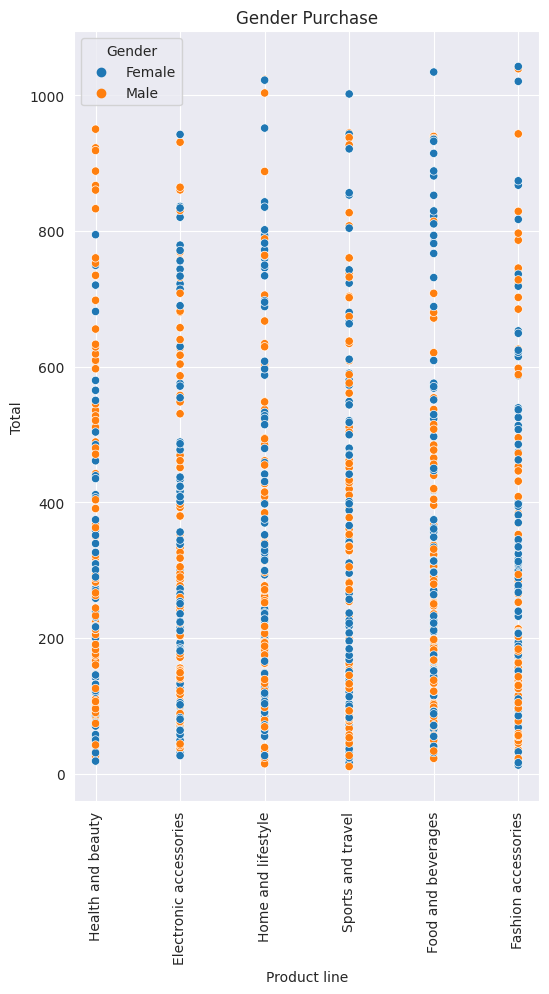

In [33]:
plt.figure(figsize=(6,10))
plt.title('Gender Purchase')
sns.scatterplot(x='Product line',y='Total',hue='Gender',data=supermarket_df);
plt.xticks(products, rotation='vertical');

- Los hombres compran más productos en 3 categorías: `Electronic accessories`: 86 hombres, `Health and beauty`: 88 hombres, `Home and lifestyle`: 81 hombres.

- Las mujeres compran más productos en 3 categorías: `Fashion accessories`: 96 mujeres, `Food and beverages`: 90 mujeres, `Sports and travel`: 88 mujeres

**`Q4: ¿Cuántas personas compran más que el precio medio en cada categoría? ¿Son miembros del supermercado?`**

In [34]:
mean_sale=supermarket_df['Total'].mean()
product_line=supermarket_df['Product line'].unique()

In [35]:
print('The average sale of product is {:.3f}$'.format(mean_sale))

The average sale of product is 322.967$


In [36]:
display(product_line)

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [37]:
people=[]

for product in product_line:
    p=supermarket_df[(supermarket_df['Total']>322.96) & (supermarket_df['Product line'] == product)].count()['Total']
    people.append(p)
    
num_people=np.sum(people)

In [38]:
df_byproduct = pd.DataFrame(list(zip(product_line.tolist(),people)), columns=['Product line','Total']).set_index('Product line')
df_byproduct

,Total
Product line,
Health and beauty,60
Electronic accessories,67
Home and lifestyle,66
Sports and travel,75
Food and beverages,67
Fashion accessories,69


In [39]:
print("Total de personas que compra más que el precio medio: ", num_people)

Total de personas que compra más que el precio medio:  404


**`Q5: ¿Cuál es el método de pago favorito de los socios? de los clientes normales?`**

In [40]:
method=supermarket_df[supermarket_df['Customer type']=='Normal'].groupby('Payment').count()['Customer type']
method

Payment
Cash           176
Credit card    139
Ewallet        184
Name: Customer type, dtype: int64

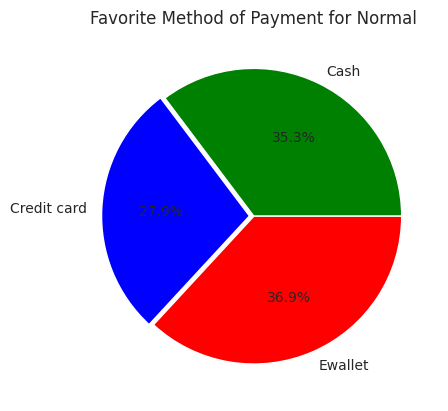

In [41]:
payment=['Cash','Credit card','Ewallet']
c=['g','b','r']

plt.pie(method,colors=c,labels=payment,explode=[0,0.03,0],autopct='%1.1f%%')
plt.title('Favorite Method of Payment for Normal')
plt.show()

In [42]:
method=supermarket_df[supermarket_df['Customer type']=='Member'].groupby('Payment').count()['Customer type']
method

Payment
Cash           168
Credit card    172
Ewallet        161
Name: Customer type, dtype: int64

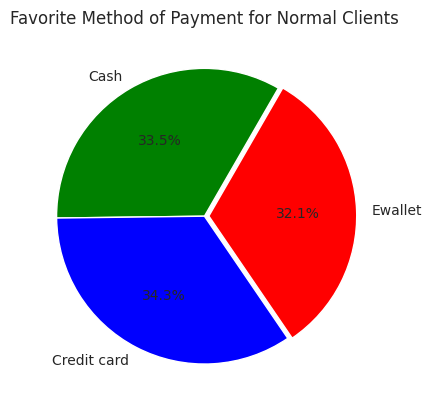

In [43]:
payment=['Cash','Credit card','Ewallet']
c=['g','b','r']

plt.pie(method,colors=c,labels=payment,startangle=60,explode=[0,0,0.03],autopct='%1.1f%%')
plt.title('Favorite Method of Payment for Normal Clients')
plt.show()

**`Q6: ¿A qué hora debemos mostrar un anuncio para maximizar los ingresos?`**

In [44]:
sales_byhour=supermarket_df.groupby('hour').sum().reset_index()
sales_byhour=sales_byhour[['hour', 'Total']].copy()
sales_byhour

,hour,Total
0,10,31421.4810
1,11,30377.3295
2,12,26065.8825
3,13,34723.2270
4,14,30828.3990
5,15,31179.5085
6,16,25226.3235
7,17,24445.2180
8,18,26030.3400
9,19,39699.5130


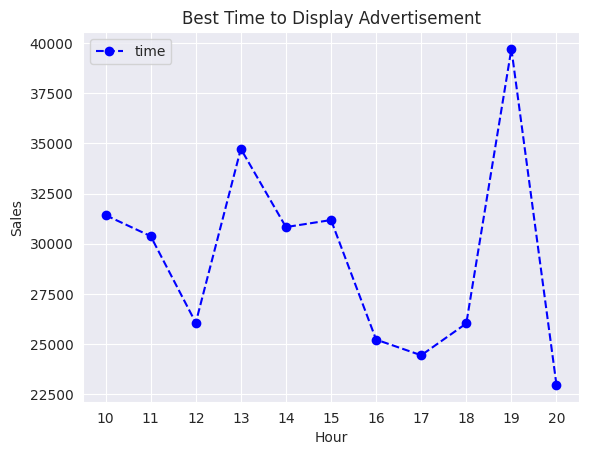

In [45]:
plt.plot(sales_byhour.hour, sales_byhour.Total,'o--b')
plt.xlabel('Hour')
plt.xticks(sales_byhour.hour)
plt.ylabel('Sales')
plt.title('Best Time to Display Advertisement')
plt.legend(['time'])
plt.show()

**`Inferencias`**

- Hemos sacado muchas conclusiones del `dataframe`. A continuación resumimos algunas de ellas:

    - La sucursal C que está en Naypyitaw tiene el mayor número de transacciones y ventas.
    - El mes de febrero es el que tiene el menor número de ventas y el de enero es el que tiene más ventas.
    - La cantidad de productos está bien distribuida.
    - La categoría de alimentos y bebidas es la que produce la mayor cantidad de ventas.
    - Los hombres compran más productos en 3 categorías : Electrónica, salud y belleza, hogar y estilo de vida.
    - Las mujeres compran más productos en 3 categorías: Moda, Alimentación y bebidas, y Viajes.
    - 404 personas de cada 1000 compran más que el precio medio. La categoría de deportes y viajes es la que tiene más (75)personas que compran más que el precio medio.
    - El efectivo es el método de pago preferido por los clientes. El socio utilizó una tarjeta de crédito y dinero en efectivo para completar la transacción. El cliente normal prefiere utilizar Ewallet y efectivo.
    - La hora preferida para mostrar la publicidad es antes de las 13h y las 19h